In [15]:
import pandas as pd
import requests
import bs4 as bs
import urllib.request

from general_functions import get_file_contents
from general_functions import load_xml_to_dataframe


url = 'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade'
filename = 'ServiceKey 국토교통부 아파트매매 실거래.txt'
api_key = get_file_contents(filename)


In [40]:
df = pd.DataFrame()
for ymd in range(202101, 202205):  # ['202101', '202204', '202205']:
    params = {'serviceKey': api_key, 'LAWD_CD': '50130', 'DEAL_YMD': str(ymd)}
    try:
        d = load_xml_to_dataframe(requests.get(url,
                                           params=params
                                           ).text, 'item')
        df = df.append(d, ignore_index=True)
    except:
        pass


In [41]:
df['거래일자'] = df.년.astype(str) + '-' + df.월.astype(str) + '-' + df.일.astype(str)
df['거래일자'] = pd.to_datetime(df['거래일자'])


In [42]:
for col in ['거래금액', '건축년도', '년', '층', '일', '월']:
    df[col] = pd.to_numeric(df[col].str.replace(",", ""))


In [43]:
import numpy as np
pd.pivot_table(data=df, index='법정동', columns='거래유형',
               values='거래금액', aggfunc=sum, fill_value=0)


거래유형,,중개거래,직거래
법정동,,,
강정동,7770200,2214400,123930
동홍동,5595273,2757630,786400
법환동,52580,30050,5000
보목동,109100,98200,39800
서귀동,699900,230800,73800
서호동,3512650,1394500,82000
서홍동,1471212,756250,249250
신효동,98600,66200,33500
중문동,3539550,1449340,196130


In [44]:
import pydeck as pdk
import streamlit as st


In [45]:
import os
from dotenv import load_dotenv

load_dotenv(verbose=True)
token = os.getenv('MAPBOX_API_KEY')


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

sns.set_palette('Set2')

plt.rcParams['font.family'] = 'AppleGothic'

#figsize 를 전역으로 설정
plt.rcParams['figure.figsize'] = (13, 8)


import matplotlib.font_manager as fm

#설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list


plt.figure(figsize=(10, 5))
plt.plot(df.거래금액)
plt.show()


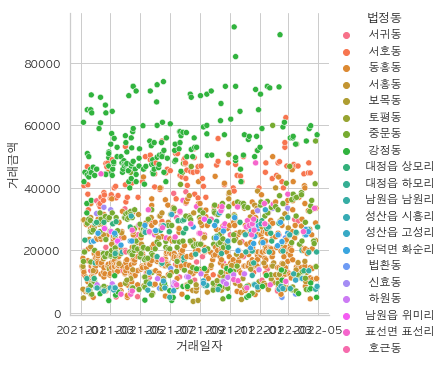

In [73]:
sns.relplot(x="거래일자", y="거래금액",
             hue="법정동", 
             data=df)


In [75]:
result = pd.pivot_table(data=df, index='법정동', values='거래금액',
                        aggfunc='sum', fill_value=0).sort_values('거래금액', ascending=False)
result[:10]


,거래금액
법정동,
강정동,10108530
동홍동,9139303
중문동,5185020
서호동,4989150
서홍동,2476712
표선면 표선리,1130250
서귀동,1004500
안덕면 화순리,969761
대정읍 상모리,864830


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [51]:
import plotly.graph_objs as go
import plotly.offline as py

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


In [ ]:
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

In [105]:
import plotly.express as px

fig = px.scatter(
    df,
    color='법정동',
    x=df.거래일자.sort_values(ascending=True),
    y=df.거래금액
    )

fig.show()

fig.write_html("output.html")
